In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from datetime import datetime

In [33]:
bg_data = pd.read_csv(r'data\sipm_spectroscopy\vp2ps_20250324-095000.csv')
cobalt_data = pd.read_csv(r'data\sipm_spectroscopy\vp2ps_20250323-150545_co60_18h.csv')
bg_data['mV'] = bg_data['V']*1000
cobalt_data['mV'] = cobalt_data['V']*1000
bg_data['t'] = pd.to_datetime(bg_data['t'])
cobalt_data['t'] = pd.to_datetime(cobalt_data['t'])
cobalt_measurement_time = (cobalt_data['t'].iloc[-1] - cobalt_data['t'].iloc[0]).seconds
bg_measurement_time = (bg_data['t'].iloc[-1] - bg_data['t'].iloc[0]).seconds

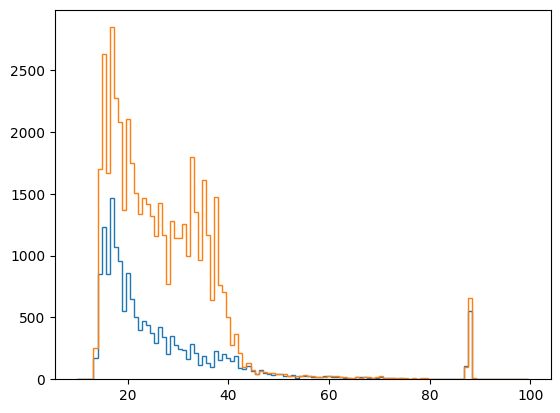

In [ ]:
bins = np.arange(10,100, 0.8)
bg_count, bins, _ = plt.hist(bg_data['mV'], bins= bins, histtype='step')
co_count, _, _ = plt.hist(cobalt_data['mV'], bins = bins, histtype='step')
plt.show()

bin_centers = (bins[:-1] + bins[1:])/2

C:\Users\tobif\AppData\Local\Temp\ipykernel_17480\3841483387.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(bin_centers, co_count/bg_count)
C:\Users\tobif\AppData\Local\Temp\ipykernel_17480\3841483387.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(bin_centers, co_count/bg_count)
C:\Users\tobif\AppData\Local\Temp\ipykernel_17480\3841483387.py:3: RuntimeWarning: invalid value encountered in divide
  co_count = co_count*bg_measurement_time/cobalt_measurement_time


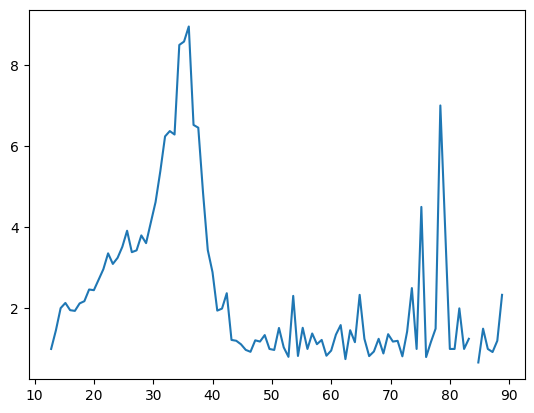

In [ ]:
plt.plot(bin_centers, co_count/bg_count)
co_count = co_count*bg_measurement_time/cobalt_measurement_time
